# Phenotype Synergy Analysis

This notebook contains code to interprete results from the synergy score analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
import os
import sys
import logging
mf_module_path = os.path.abspath(os.path.join('../python'))
if mf_module_path not in sys.path:
    sys.path.append(mf_module_path)
import mf
import mf_random
import hpoutil
import networkx
import obonet
import pickle

In [3]:
hpo = hpoutil.HPO('/Users/zhangx/git/human-phenotype-ontology/hp.obo')

## Synergy among Lab-derived Abnormal Phenotypes

In [4]:
with open('synergies.obj', 'rb') as synergies_file:
    deserialized = pickle.load(synergies_file)

In [5]:
len(deserialized)

31

Plot the synergy scores. They are all pretty small.

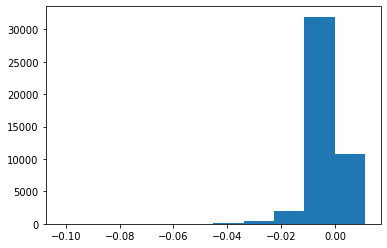

In [6]:
heart_failure = deserialized['428']
plt.hist(heart_failure.pairwise_synergy().flat, bins=10)
plt.show()

In [7]:
# load p values estimated from empirical distributions
path = '/Users/zhangx/git/MIMIC_HPO/src/main/resources/p_value_map_428.obj'
with open(path, 'rb') as f:
    p_value_map = pickle.load(f)
p_heart_failure = p_value_map['428']

In [8]:
data = heart_failure.pairwise_synergy_labeled_with_p_values(p_heart_failure)
data.reset_index(drop=True).head()

,P1,P2,synergy,p
0,HP:0025546,HP:0025548,0.011284,0.0
1,HP:0025548,HP:0025546,0.011284,0.0
2,HP:0012379,HP:0002904,0.009951,0.0
3,HP:0002904,HP:0012379,0.009951,0.0
4,HP:0003573,HP:0012379,0.009292,0.0


remove duplication record: (HP1, HP2) is the same to (HP2, HP1)

In [49]:
mask = np.array([hpo.has_dependency(data.P1[i], data.P2[i]) for i in np.arange(data.shape[0])])
S_heart_failure = data.loc[np.logical_not(mask), :].sort_values(by = 'synergy', ascending=False)
S_heart_failure = S_heart_failure.loc[S_heart_failure.P1 < S_heart_failure.P2, :]
S_heart_failure['P1_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in S_heart_failure.P1])
S_heart_failure['P2_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in S_heart_failure.P2])
top5percent_synergy_pair_heart_failure = S_heart_failure.iloc[0:math.ceil(0.05 * len(S_heart_failure)), :]
top5percent_synergy_pair_heart_failure.head(2)

,P1,P2,synergy,P1_label,P2_label
1,HP:0000119,HP:0003282,0.000168,Abnormality of the genitourinary system,Low alkaline phosphatase
2,HP:0003207,HP:0032368,0.000157,Arterial calcification,Acidemia


In [ ]:
top5percent_synergy_pair_heart_failure.to_csv('top5percent_synergy_pair_heart_failure.csv', index=False)

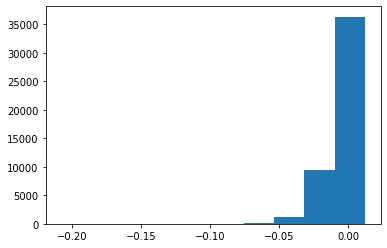

In [17]:
acute_renal_failure = deserialized['584']
plt.hist(acute_renal_failure.pairwise_synergy().flat, bins=10)
plt.show()

In [18]:
# load p values estimated from empirical distributions
path = '/Users/zhangx/git/MIMIC_HPO/src/main/resources/p_value_map_584.obj'
with open(path, 'rb') as f:
    p_value_map = pickle.load(f)
p_renal_failure = p_value_map['584']
data = acute_renal_failure.pairwise_synergy_labeled_with_p_values(p_renal_failure)
data.reset_index(drop=True).head()

,P1,P2,synergy,p
0,HP:0002904,HP:0011014,0.012154,0.0
1,HP:0002904,HP:0011015,0.012154,0.0
2,HP:0011014,HP:0002904,0.012154,0.0
3,HP:0011015,HP:0002904,0.012154,0.0
4,HP:0001928,HP:0002904,0.011185,0.0


In [22]:
mask = np.array([hpo.has_dependency(data.P1[i], data.P2[i]) for i in np.arange(data.shape[0])])
S_acute_renal_failure = data.loc[np.logical_not(mask), :].sort_values(by = 'synergy', ascending=False)
S_acute_renal_failure = S_acute_renal_failure.loc[S_acute_renal_failure.P1 < S_acute_renal_failure.P2, :]
S_acute_renal_failure['P1_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in S_acute_renal_failure.P1])
S_acute_renal_failure['P2_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in S_acute_renal_failure.P2])
top5percent_synergy_pair_acute_renal_failure = S_acute_renal_failure.iloc[0:math.ceil(0.05 * len(S_acute_renal_failure)), :]
top5percent_synergy_pair_acute_renal_failure.head(20)

,P1,P2,synergy,p,P1_label,P2_label
0,HP:0002904,HP:0011014,0.012154,0.0,Hyperbilirubinemia,Abnormal glucose homeostasis
1,HP:0002904,HP:0011015,0.012154,0.0,Hyperbilirubinemia,Abnormal blood glucose concentration
4,HP:0001928,HP:0002904,0.011185,0.0,Abnormality of coagulation,Hyperbilirubinemia
6,HP:0003573,HP:0011014,0.010479,0.0,Increased total bilirubin,Abnormal glucose homeostasis
7,HP:0003573,HP:0011015,0.010479,0.0,Increased total bilirubin,Abnormal blood glucose concentration
11,HP:0002904,HP:0003074,0.009499,0.0,Hyperbilirubinemia,Hyperglycemia
13,HP:0001928,HP:0003573,0.008893,0.0,Abnormality of coagulation,Increased total bilirubin
15,HP:0002904,HP:0010927,0.008887,0.0,Hyperbilirubinemia,Abnormal blood inorganic cation concentration
17,HP:0002904,HP:0004363,0.008813,0.0,Hyperbilirubinemia,Abnormal circulating calcium concentration
19,HP:0002901,HP:0002904,0.008680,0.0,Hypocalcemia,Hyperbilirubinemia


In [ ]:
top5percent_synergy_pair_acute_renal_failure.to_csv('top5percent_synergy_pair_acute_renal_failure.csv', index=False)

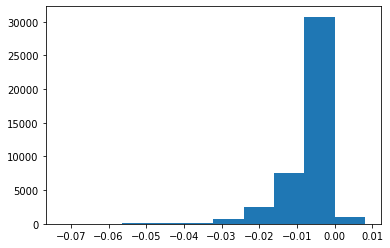

In [23]:
sepsis = deserialized['038']
plt.hist(sepsis.pairwise_synergy().flat, bins=10)
plt.show()

In [24]:
# load p values estimated from empirical distributions
path = '/Users/zhangx/git/MIMIC_HPO/src/main/resources/p_value_map_038.obj'
with open(path, 'rb') as f:
    p_value_map = pickle.load(f)
p_sepsis = p_value_map['038']
data = sepsis.pairwise_synergy_labeled_with_p_values(p_sepsis)
data.reset_index(drop=True).head()

,P1,P2,synergy,p
0,HP:0002904,HP:0011015,0.008162,0.0
1,HP:0002904,HP:0011014,0.008162,0.0
2,HP:0011015,HP:0002904,0.008162,0.0
3,HP:0011014,HP:0002904,0.008162,0.0
4,HP:0011015,HP:0003573,0.006819,0.0


In [25]:
mask = np.array([hpo.has_dependency(data.P1[i], data.P2[i]) for i in np.arange(data.shape[0])])
S_sepsis = data.loc[np.logical_not(mask), :].sort_values(by = 'synergy', ascending=False)
S_sepsis = S_sepsis.loc[S_sepsis.P1 < S_sepsis.P2, :]
top5percent = S_sepsis.shape[0] * 0.05
top5percent_synergy_pair_sepsis = S_sepsis.reset_index(drop=True).iloc[0:int(top5percent), :]
top5percent_synergy_pair_sepsis['P1_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in top5percent_synergy_pair_sepsis.P1])
top5percent_synergy_pair_sepsis['P2_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in top5percent_synergy_pair_sepsis.P2])



In [26]:
top5percent_synergy_pair_sepsis.head(n = 100)

,P1,P2,synergy,p,P1_label,P2_label
0,HP:0002904,HP:0011015,0.008162,0.000000,Hyperbilirubinemia,Abnormal blood glucose concentration
1,HP:0002904,HP:0011014,0.008162,0.000000,Hyperbilirubinemia,Abnormal glucose homeostasis
2,HP:0003573,HP:0011015,0.006819,0.000000,Increased total bilirubin,Abnormal blood glucose concentration
3,HP:0003573,HP:0011014,0.006819,0.000000,Increased total bilirubin,Abnormal glucose homeostasis
4,HP:0002904,HP:0003074,0.006602,0.000000,Hyperbilirubinemia,Hyperglycemia
...,...,...,...,...,...,...
95,HP:0012200,HP:0410173,0.000971,0.004861,Abnormality of prothrombin,Increased troponin I level in blood
96,HP:0025065,HP:0100827,0.000965,0.008617,Abnormal mean corpuscular volume,Lymphocytosis
97,HP:0410173,HP:0500164,0.000954,0.010606,Increased troponin I level in blood,Abnormal blood carbon dioxide level
98,HP:0003573,HP:0031970,0.000935,0.009280,Increased total bilirubin,Abnormal blood urea nitrogen concentration


In [ ]:
top5percent_synergy_pair_sepsis.to_csv('top5percent_synergy_pair_sepsis.csv', index=False)

## Synergy between Radiology- and Lab-derived Abnormal Phenotypes

In [28]:
with open('synergies_radiology_lab.obj', 'rb') as synergies_file:
    synergies_rad_lab = pickle.load(synergies_file)

In [29]:
len(synergies_rad_lab)

48

In [45]:
def filtered_and_save_synergy_dataframe(synergy_map, icd, icd_label):
    data = synergies_rad_lab[icd].pairwise_synergy_labeled()
    mask = np.array([hpo.has_dependency(data.P1[i], data.P2[i]) for i in np.arange(data.shape[0])])
    data_filtered = data.loc[np.logical_not(mask), :].sort_values(by = 'synergy', ascending=False)
    data_filtered = data_filtered.loc[data_filtered.P1 < data_filtered.P2, :]
    data_filtered['P1_radiology_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in data_filtered.P1])
    data_filtered['P2_lab_label'] = np.array([hpo.term_id2name_map().get(termid) for termid in data_filtered.P2])
    top5percent_synergy_pair = data_filtered.iloc[0:math.ceil(0.05 * len(data_filtered)), :]
    filename = 'synergy-radiology_labtest-{}.csv'.format(icd_label)
    top5percent_synergy_pair.to_csv(filename, index=False)



In [46]:
filtered_and_save_synergy_dataframe(synergies_rad_lab, icd = '428', icd_label = 'heart_failure')

In [47]:
filtered_and_save_synergy_dataframe(synergies_rad_lab, icd = '584', icd_label = 'acute_renal_failure')

In [48]:
filtered_and_save_synergy_dataframe(synergies_rad_lab, icd = '038', icd_label = 'sepsis')

,P1,P2,synergy,P1_radiology_label,P2_lab_label
0,HP:0012252,HP:0031851,0.000148,Abnormal respiratory system morphology,Reduced hematocrit
2,HP:0002103,HP:0003113,0.000117,Abnormality of the pleura,Hypochloremia
3,HP:0001438,HP:0001943,0.000117,Abnormality of abdomen morphology,Hypoglycemia
6,HP:0025032,HP:0032251,0.000107,Abnormality of digestive system physiology,Abnormal immune system morphology
7,HP:0011028,HP:0012116,0.000105,Abnormality of blood circulation,Abnormal albumin level
11,HP:0001945,HP:0410288,0.000100,Fever,Hyperamylasemia
12,HP:0000079,HP:0004379,0.000100,Abnormality of the urinary system,Abnormality of alkaline phosphatase activity
13,HP:0012718,HP:0032251,0.000099,Morphological abnormality of the gastrointesti...,Abnormal immune system morphology
15,HP:0001892,HP:0032239,0.000095,Abnormal bleeding,Increased circulating band cell count
16,HP:0002835,HP:0020059,0.000095,Aspiration,Increased red blood cell count
